In [299]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [300]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [301]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [302]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")


In [303]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)


In [304]:
# Print all of the classes mapped to the Base
Base.classes.keys()


['measurement', 'station']

In [305]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station


In [306]:
# Create a session
session = Session(engine)


# Exploratory Precipitation Analysis

In [307]:
# Find the most recent date in the data set.
date_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
date_recent


'2017-08-23'

In [308]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# I have split the cells to check the results as I go. The inital cell provided in this starter code has the all the data 
# collated together at the end of these cells.  There is a double up of reqquired information too show workings.

In [309]:
# Calculate the date one year from the last date in data set.
date_start = dt.date(2017, 8, 23) - dt.timedelta(days=365)
date_start


datetime.date(2016, 8, 23)

In [310]:
# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= date_start).all()
data

# null values identified and require removal with dropna function

[('2016-08-23', 0.0),
 ('2016-08-24', 2.0),
 ('2016-08-25', 2.0),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.3),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 3.3),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.8),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 1.3),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.8),
 ('2016-09-10', 0.0),
 ('2016-09-11', 1.3),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.5),
 ('2016-09-14', 33.5),
 ('2016-09-15', 10.7),
 ('2016-09-16', 1.5),
 ('2016-09-17', 1.3),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.5),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 1.5),
 ('2016-09-27', 0.5),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('201

In [311]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names 
# Include dropping Null values
results_df = pd.DataFrame(data, columns = ['date', 'precipitation'])
results_df = pd.DataFrame(data = results_df).set_index('date').dropna()
results_df


,precipitation
date,
2016-08-23,0.0
2016-08-24,2.0
2016-08-25,2.0
2016-08-26,0.0
2016-08-27,0.0
...,...
2017-08-17,3.3
2017-08-19,2.3
2017-08-21,14.2


In [312]:
# Sort the dataframe by date
results_df = results_df.sort_values(by='date')
results_df


,precipitation
date,
2016-08-23,0.0
2016-08-23,0.5
2016-08-23,1.3
2016-08-23,17.8
2016-08-23,3.8
...,...
2017-08-22,12.7
2017-08-23,0.0
2017-08-23,2.0


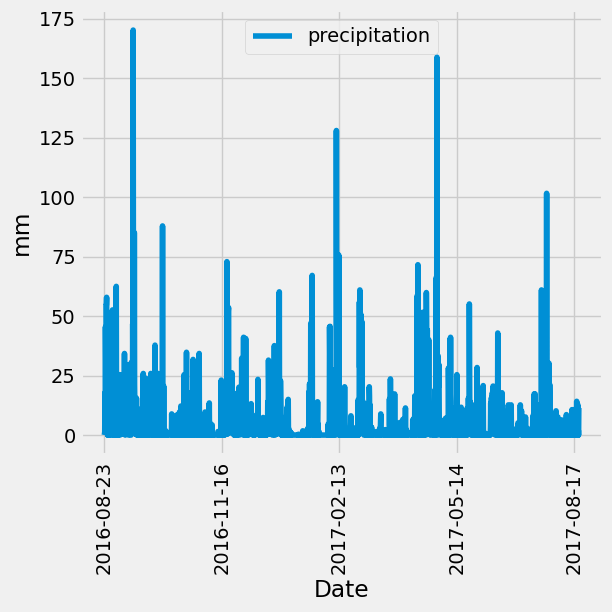

In [315]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
date_start = dt.date(2017, 8, 23) - dt.timedelta(days=365)
date_start

# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= date_start).all()
data

# Save the query results as a Pandas DataFrame. Explicitly set the column names
results_df = pd.DataFrame(data, columns = ['date', 'precipitation'])
results_df = pd.DataFrame(data = results_df).set_index('date').dropna()
results_df

# Sort the dataframe by date
results_df = results_df.sort_values(by='date')
results_df

# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot(rot=90, xlabel = 'Date', ylabel='mm', figsize=(6,5.5))
plt.legend(['precipitation'], loc='upper center')

# title not required as below - inserted for record
# plt.title('Hawaii Precipitation Data from 23/08/2016 to 23/08/2017')

# saving fig not required - saved for my record
plt.savefig('./precipitation_hawaii_2016_2017.png')


In [316]:
# Use Pandas to calculate the summary statistics for the precipitation data
results_df.describe()


,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [317]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.name)).all()
total_stations


[(9,)]

In [318]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()
most_active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [319]:
# From the Rubric = Answer the following question: which station id has the greatest number of observations?
# USC00519281 station id with a total of 2772 observations, has the greatest number of observations. 


In [320]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(lowest_temp, highest_temp, avg_temp)


[(12.2,)] [(29.4,)] [(22.03582251082252,)]


In [321]:
# From the Rubric = Save the query results to a Pandas DataFrame
temps_USC00519281_df = pd.DataFrame({'Lowest Temp': lowest_temp,
                                    'Highest Temp': highest_temp, 
                                    'Average Temp': avg_temp})
temps_USC00519281_df

,Lowest Temp,Highest Temp,Average Temp
0,(12.2),(29.4),(22.03582251082252)


In [322]:
# From the Rubric = Design a query to get the previous 12 months of temperature observation (TOBS) data. To do so, 
# complete the following steps:

# Filter by the station that has the greatest number of observations.
# most_active_stations

# Using the most active station id 'USC00519281'

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_tobs = session.query(Measurement.station, Measurement.tobs).filter(Measurement.date >= '2016-08-23')\
    .filter(Measurement.station == 'USC00519281').all()

station_tobs_df= pd.DataFrame(station_tobs)
station_tobs_df.head()


,station,tobs
0,USC00519281,25.0
1,USC00519281,25.0
2,USC00519281,26.7
3,USC00519281,26.7
4,USC00519281,23.9


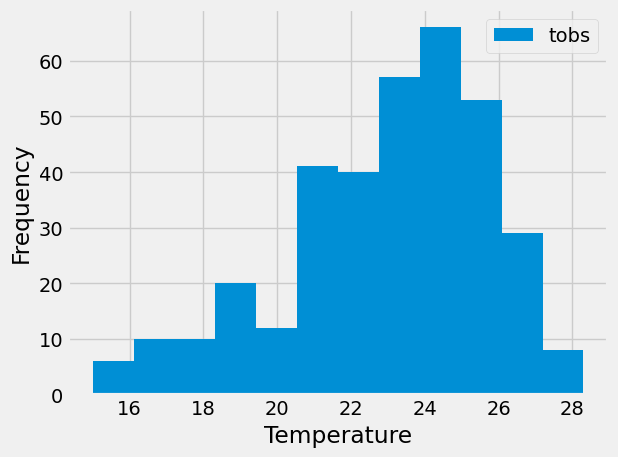

In [323]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_tobs_df.plot.hist(bins = 12, xlabel = 'Temperature', ylabel = 'Frequency')

# title not required as below - inserted for record 
# plt.title('Station USC00519281 Temperature Observations', size = 14)

plt.tight_layout()

# saving fig not required - saved for my record
plt.savefig('./histogram Station USC00519281 Temps.png')

plt.show()

# Close Session